In [1]:
import numpy as np
import pandas as pd
import yaml
import os
import pickle

In [2]:
with open("../config/path.yaml", "r") as file:  # Replace with your path to your YAML file
    config = yaml.safe_load(file) 

data_path = config.get("raw_data") 
if not data_path:
    raise ValueError("Data path not found in the YAML configuration.")

print(f"Data path loaded from YAML: {data_path}") 

Data path loaded from YAML: C:/Users/darte/Documents/Projects/healthcare-anomaly/data/PPG_FieldStudy


In [3]:
if not os.path.exists(data_path):
    raise FileNotFoundError(f"The specified data path does not exist: {data_path}")
if not os.path.isdir(data_path):
    raise NotADirectoryError(f"The specified data path is not a directory: {data_path}")

patient_folders = [os.path.join(data_path, folder) for folder in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, folder))]

print(f"Found {len(patient_folders)} patient folders in the data path.")  # Optional: Print the number of patient folders found


Found 15 patient folders in the data path.


In [4]:
import pickle
import os

# Example: Load and view raw data for the first patient folder
if patient_folders:
    first_patient_folder = patient_folders[0]
    patient_id = os.path.basename(first_patient_folder)
    pkl_file = os.path.join(first_patient_folder, f"{patient_id}.pkl")
    
    if os.path.exists(pkl_file):
        with open(pkl_file, "rb") as file:
            raw_data = pickle.load(file, encoding="latin1")
        
        # Print the keys and a sample of the data
        print(f"Keys in raw data for patient {patient_id}: {raw_data.keys()}")
        print(f"Sample data: {raw_data}")
    else:
        print(f"No .pkl file found for patient {patient_id}.")
else:
    print("No patient folders found.")

Keys in raw data for patient S1: dict_keys(['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject'])
Sample data: {'rpeaks': array([    240,    1174,    2128, ..., 6447292, 6447748, 6448224]), 'signal': {'chest': {'ACC': array([[ 0.85640001, -0.06779999, -0.36559999],
       [ 0.8556    , -0.06900001, -0.3646    ],
       [ 0.852     , -0.07020003, -0.3642    ],
       ...,
       [ 0.88759995, -0.1038    , -0.27920002],
       [ 0.88619995, -0.10159999, -0.27819997],
       [ 0.88680005, -0.10140002, -0.27380002]]), 'ECG': array([[0.01560974],
       [0.01812744],
       [0.01753235],
       ...,
       [0.21368408],
       [0.21556091],
       [0.21702576]]), 'EMG': array([[-1.5],
       [-1.5],
       [-1.5],
       ...,
       [-1.5],
       [-1.5],
       [-1.5]]), 'EDA': array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), 'Temp': array([[-273.15],
       [-273.15],
       [-273.15],
       ...,
       [-273.15],
       [-273.15

In [5]:
# Iterate through all patient folders
for folder in patient_folders:
    patient_id = os.path.basename(folder)
    pkl_file = os.path.join(folder, f"{patient_id}.pkl")
    
    if os.path.exists(pkl_file):
        with open(pkl_file, "rb") as file:
            raw_data = pickle.load(file, encoding="latin1")
        
        # Assuming 'label' or 'signal' keys exist in the raw data
        if "label" in raw_data:
            num_rows = len(raw_data["label"])  # Count rows based on labels
            print(f"Patient {patient_id} has {num_rows} rows.")
        else:
            print(f"Patient {patient_id} does not have 'label' data.")
    else:
        print(f"No .pkl file found for patient {patient_id}.")

Patient S1 has 4603 rows.
Patient S10 has 5321 rows.
Patient S11 has 4521 rows.
Patient S12 has 3954 rows.
Patient S13 has 4565 rows.
Patient S14 has 4476 rows.
Patient S15 has 3966 rows.
Patient S2 has 4099 rows.
Patient S3 has 4367 rows.
Patient S4 has 4572 rows.
Patient S5 has 4649 rows.
Patient S6 has 2622 rows.
Patient S7 has 4668 rows.
Patient S8 has 4037 rows.
Patient S9 has 4277 rows.


In [6]:
import os
import pickle

# Example: Access wrist temperature data for Patient 1
patient_id = "S1"  # Replace with the desired patient ID
data_path = "c:/Users/darte/Documents/Projects/healthcare-anomaly/data/PPG_FieldStudy"  # Replace with your actual data path

# Construct the path to the patient's folder and .pkl file
patient_folder = os.path.join(data_path, patient_id)
pkl_file = os.path.join(patient_folder, f"{patient_id}.pkl")

# Check if the .pkl file exists
if os.path.exists(pkl_file):
    with open(pkl_file, "rb") as file:
        raw_data = pickle.load(file, encoding="latin1")
    
    # Access the wrist temperature data
    if "signal" in raw_data and "wrist" in raw_data["signal"] and "TEMP" in raw_data["signal"]["wrist"]:
        wrist_temperature_data = raw_data["signal"]["wrist"]["TEMP"]
        print(f"Wrist temperature data for patient {patient_id}:")
        print(wrist_temperature_data)
    else:
        print(f"Wrist temperature data not found for patient {patient_id}.")
else:
    print(f"No .pkl file found for patient {patient_id}.")

Wrist temperature data for patient S1:
[[32.13]
 [32.16]
 [32.16]
 ...
 [34.37]
 [34.37]
 [34.37]]


In [7]:
import os
import pickle

# Example: Access chest respiration data for Patient 1
patient_id = "S1"  # Replace with the desired patient ID
data_path = "c:/Users/darte/Documents/Projects/healthcare-anomaly/data/PPG_FieldStudy"  # Replace with your actual data path

# Construct the path to the patient's folder and .pkl file
patient_folder = os.path.join(data_path, patient_id)
pkl_file = os.path.join(patient_folder, f"{patient_id}.pkl")

# Check if the .pkl file exists
if os.path.exists(pkl_file):
    with open(pkl_file, "rb") as file:
        raw_data = pickle.load(file, encoding="latin1")
    
    # Access the chest respiration data
    if "signal" in raw_data and "chest" in raw_data["signal"] and "Resp" in raw_data["signal"]["chest"]:
        chest_respiration_data = raw_data["signal"]["chest"]["Resp"]
        print(f"Chest respiration data for patient {patient_id}:")
        print(chest_respiration_data)
    else:
        print(f"Chest respiration data not found for patient {patient_id}.")
else:
    print(f"No .pkl file found for patient {patient_id}.")

Chest respiration data for patient S1:
[[ 4.4418335 ]
 [ 4.45098877]
 [ 4.47387695]
 ...
 [-3.05023193]
 [-3.05328369]
 [-3.05633545]]


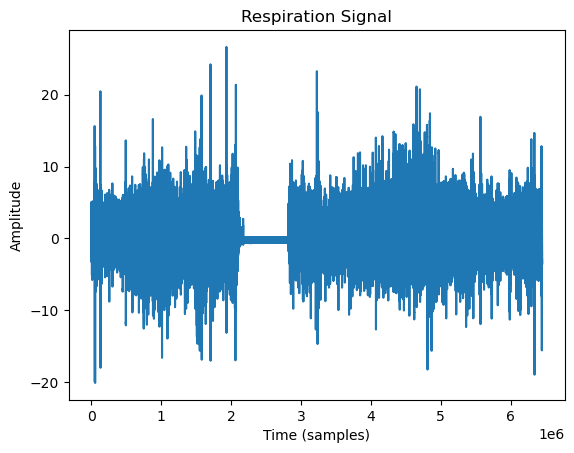

In [8]:
import matplotlib.pyplot as plt

# Plot the respiration signal
plt.plot(chest_respiration_data)
plt.title("Respiration Signal")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

In [18]:
print(wrist_temperature_data[:5])

[[32.13]
 [32.16]
 [32.16]
 [32.16]
 [32.16]]


In [16]:
# Access the BVP data for patient 1
if "signal" in raw_data and "wrist" in raw_data["signal"] and "BVP" in raw_data["signal"]["wrist"]:
    bvp_data = raw_data["signal"]["wrist"]["BVP"]
    print("First 5 rows of BVP data for patient 1:")
    print(bvp_data[:5])
else:
    print("BVP data not found for patient 1.")

First 5 rows of BVP data for patient 1:
[[7.28]
 [6.33]
 [5.46]
 [4.6 ]
 [3.74]]


In [17]:
# Access the ACC data for patient 1
if "signal" in raw_data and "wrist" in raw_data["signal"] and "ACC" in raw_data["signal"]["wrist"]:
    acc_data = raw_data["signal"]["wrist"]["ACC"]
    print("First 5 rows of ACC data for patient 1:")
    print(acc_data[:5])
else:
    print("ACC data not found for patient 1.")

First 5 rows of ACC data for patient 1:
[[-0.765625 -0.078125  0.671875]
 [-0.765625 -0.078125  0.65625 ]
 [-0.765625 -0.078125  0.671875]
 [-0.765625 -0.078125  0.671875]
 [-0.75     -0.078125  0.671875]]
